# Importation des bibliohèques et de  la base de données 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df1=pd.read_csv("/content/drive/MyDrive/dataset/olist_customers_dataset.csv")
df2=pd.read_csv('/content/drive/MyDrive/dataset/olist_order_payments_dataset.csv')
df3=pd.read_csv('/content/drive/MyDrive/dataset/olist_order_reviews_dataset.csv')
df4=pd.read_csv("/content/drive/MyDrive/dataset/olist_orders_dataset.csv")

In [4]:
#Join datasetets
df4.shape, df2.shape, df3.shape

((99441, 8), (103886, 5), (99224, 7))

In [5]:
df=pd.merge(df4, df2, on="order_id", how="right")
df.shape

(103886, 12)

In [6]:
df=pd.merge(df, df3, on="order_id", how="left")
df.shape

(104477, 18)

In [7]:
dfi=pd.merge(df, df1, on="customer_id", how="left")
df=dfi.copy()
df.shape

(104477, 22)

In [8]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [9]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG


# Infos sur la dataset

In [10]:
df[['customer_id','customer_unique_id' ]]
df["customer_id"].isnull().sum(), df["customer_unique_id"].isnull().sum()

(0, 0)

In [11]:
df['customer_id'].duplicated().sum()

5037

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104477 non-null  object 
 1   customer_id                    104477 non-null  object 
 2   order_status                   104477 non-null  object 
 3   order_purchase_timestamp       104477 non-null  object 
 4   order_approved_at              104301 non-null  object 
 5   order_delivered_carrier_date   102579 non-null  object 
 6   order_delivered_customer_date  101323 non-null  object 
 7   order_estimated_delivery_date  104477 non-null  object 
 8   payment_sequential             104477 non-null  int64  
 9   payment_type                   104477 non-null  object 
 10  payment_installments           104477 non-null  int64  
 11  payment_value                  104477 non-null  float64
 12  review_id                     

In [13]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                     float64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
dtype: object

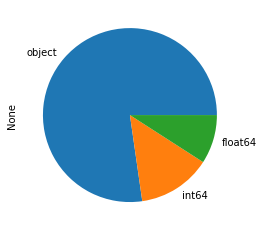

In [14]:
df.dtypes.value_counts().plot(kind='pie')

In [15]:
df['customer_id'].nunique(),df['customer_unique_id'].nunique()

(99440, 96095)

# Supression des colonnes inutiles

In [16]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

Chaque client a un identifiant unique et la variable customer_unique_id a moins de valeurs unique que le customer_id . Alors, nous supprimons le customer_id

In [17]:
#customer_unique_id
col_inu=['order_id', 'review_id','order_delivered_carrier_date','customer_id',
       'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_zip_code_prefix', 'order_approved_at' ]
df.drop(columns=col_inu, inplace=True) 
df.shape

(104477, 14)

# Valeurs manquantes

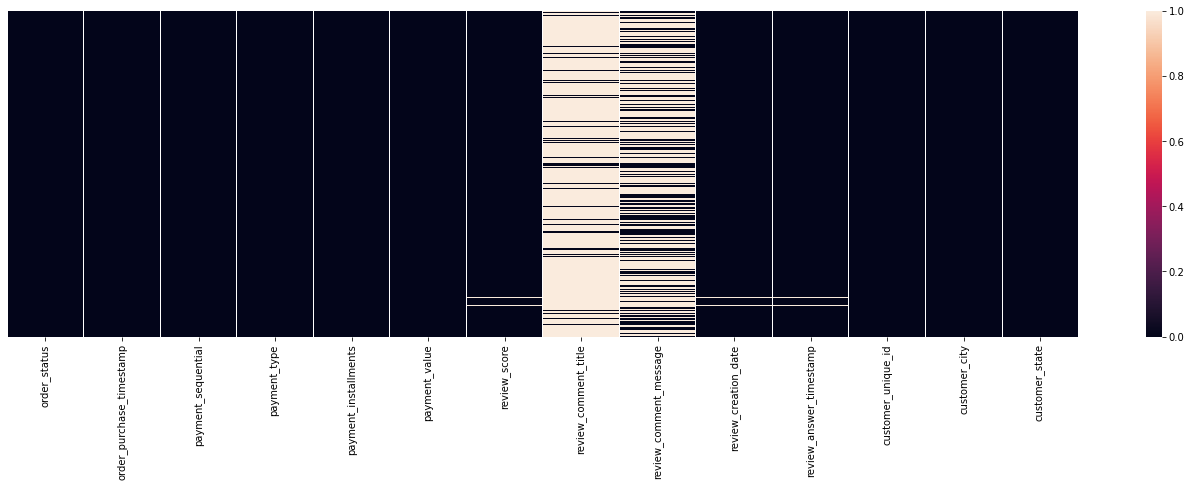

In [18]:
plt.figure(figsize=(24,6))
sns.heatmap(data=df.isnull(), yticklabels=False)

In [19]:
df.isnull().sum(axis=0)
df.isnull().sum().values

array([    0,     0,     0,     0,     0,     0,   800, 92481, 61662,
         800,   800,     0,     0,     0])

In [20]:
dic={}
def col():
  col1=list(df.isnull().sum().values*100/len(df))
  #for i in zip(df.columns, list(df.isnull().sum().values)):
  nan_df=pd.DataFrame(col1, columns=['percent'])
  nan_df["columns"]=df.columns
  nan=nan_df.sort_values(by='percent', ascending=False)
  return nan.head()
col()

,percent,columns
7,88.518047,review_comment_title
8,59.019689,review_comment_message
6,0.765719,review_score
9,0.765719,review_creation_date
10,0.765719,review_answer_timestamp


Vu qu"on a ces valeurs manquantes qui sont utiles on va joindre les titres au messages.

In [21]:
df['review_comment_message']=df['review_comment_title'].map(str)+ df['review_comment_message'].map(str)
df.drop(columns=['review_comment_title'], inplace=True)
df.isnull().sum()

order_status                  0
order_purchase_timestamp      0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
review_score                800
review_comment_message        0
review_creation_date        800
review_answer_timestamp     800
customer_unique_id            0
customer_city                 0
customer_state                0
dtype: int64

In [22]:
df[df['review_comment_message']=='nannan']['review_comment_message']="No comment"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
col()

,percent,columns
6,0.765719,review_score
8,0.765719,review_creation_date
9,0.765719,review_answer_timestamp
0,0.000000,order_status
1,0.000000,order_purchase_timestamp


Pour les valeurs NaN des autres colonnes, comme elles ne depassent pas 1%, on va les supprimer.

In [24]:
colonne=[i for i in df.columns if df[i].isnull().sum()>0 ]
colonne

['review_score', 'review_creation_date', 'review_answer_timestamp']

In [25]:
for i in colonne:
  df.drop(index=df[df[i].isnull()].index, inplace=True)
df.shape

(103677, 13)

In [26]:
col()

,percent,columns
0,0.0,order_status
1,0.0,order_purchase_timestamp
2,0.0,payment_sequential
3,0.0,payment_type
4,0.0,payment_installments


In [27]:
df.shape

(103677, 13)

Nous venons de nettoyer la base de données des colonnes manquantes sans trop perdre d'informations.
Nous allons maintenant chercher les doublons.

# Doublons

In [28]:
len(df.columns)
df.columns

Index(['order_status', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id', 'customer_city',
       'customer_state'],
      dtype='object')

In [29]:
df.duplicated().sum()

39

In [30]:
df.shape

(103677, 13)

Ce ne sot pas de doublons car le client peux payer plusieurs produits en meme temps.

# Feature Enginering

In [31]:
df['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

In [32]:
df['paid']=df['order_status'].apply(lambda x: 1 if x=='delivered' else 0)

In [33]:
def status(x):
  if x=='delivered':
    x=8
  elif x=='invoiced':
    x=7
  elif x=='shipped':
    x=6
  elif x=='approved':
    x=5
  elif x=='processing':
    x=4
  elif x=='created':
    x=3
  elif x=='unavailable':
    x=2
  elif x=='canceled':
    x=1
  return x

Nous allons donc changer la categorie "order_status" en codant ce dernier entre 1 et 8, selon le degré de pertience.

In [34]:
df['order_status']=df['order_status'].apply(status)

# Formatage des dates

In [35]:
df.dtypes

order_status                  int64
order_purchase_timestamp     object
payment_sequential            int64
payment_type                 object
payment_installments          int64
payment_value               float64
review_score                float64
review_comment_message       object
review_creation_date         object
review_answer_timestamp      object
customer_unique_id           object
customer_city                object
customer_state               object
paid                          int64
dtype: object

Puisque la dataset ne depasse pas la fin Septembre 2018, nous allons prendre le dernier mois comme octobre 2018

In [36]:
from datetime import date
last_date=date(2018, 10, 31)
def day(x):
  x=x.split(' ')[0]
  x=x.split('-')
  d0 = date(int(x[0]), int(x[1]), int(x[-1]))
  s=(last_date-d0).days
  return s

In [37]:
df['order_purchase_timestamp']=df['order_purchase_timestamp'].map(str).apply(day)
df['review_creation_date']=df['review_creation_date'].map(str).apply(day)
df['review_answer_timestamp']=df['review_answer_timestamp'].map(str).apply(day)
df[['order_purchase_timestamp','review_creation_date', 'review_answer_timestamp' ]]

,order_purchase_timestamp,review_creation_date,review_answer_timestamp
0,189,174,169
1,127,123,120
2,323,316,313
3,329,314,314
4,329,314,313
...,...,...,...
104472,237,228,225
104473,439,433,432
104474,347,328,328
104475,85,70,69


Creation des colonnes recency, Frequency et monetary

# Correlation entre les variables

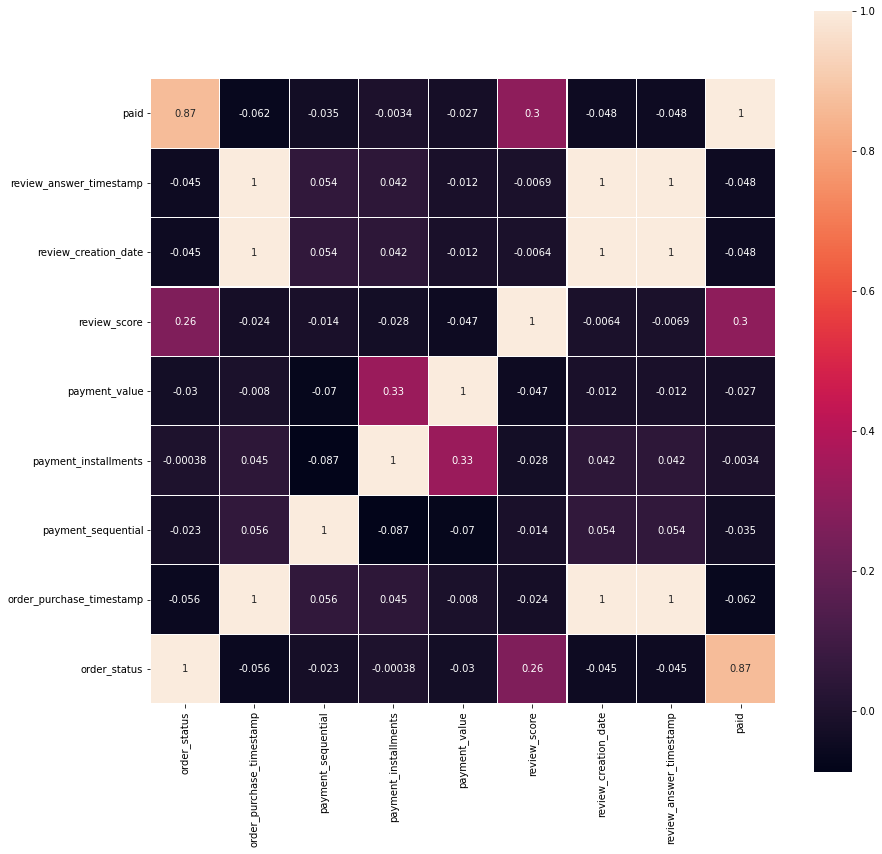

In [38]:
corr_matrix = df.corr()
fig = plt.figure(1, figsize=(14, 14))

sns.heatmap(corr_matrix, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])
plt.show()

* La variable 'order_purchase_timestamp' est correlé avec  (review_creating_date et  review_answer_timestamp)

* La variable review_answer_timestamp aussi est tres fortement correlé avec review_creating_date

* Donc on va supprimer ces 2 derniers

In [39]:
df.dtypes

order_status                  int64
order_purchase_timestamp      int64
payment_sequential            int64
payment_type                 object
payment_installments          int64
payment_value               float64
review_score                float64
review_comment_message       object
review_creation_date          int64
review_answer_timestamp       int64
customer_unique_id           object
customer_city                object
customer_state               object
paid                          int64
dtype: object

In [40]:
df.drop(columns=['review_creation_date', 'review_answer_timestamp'], inplace=True)

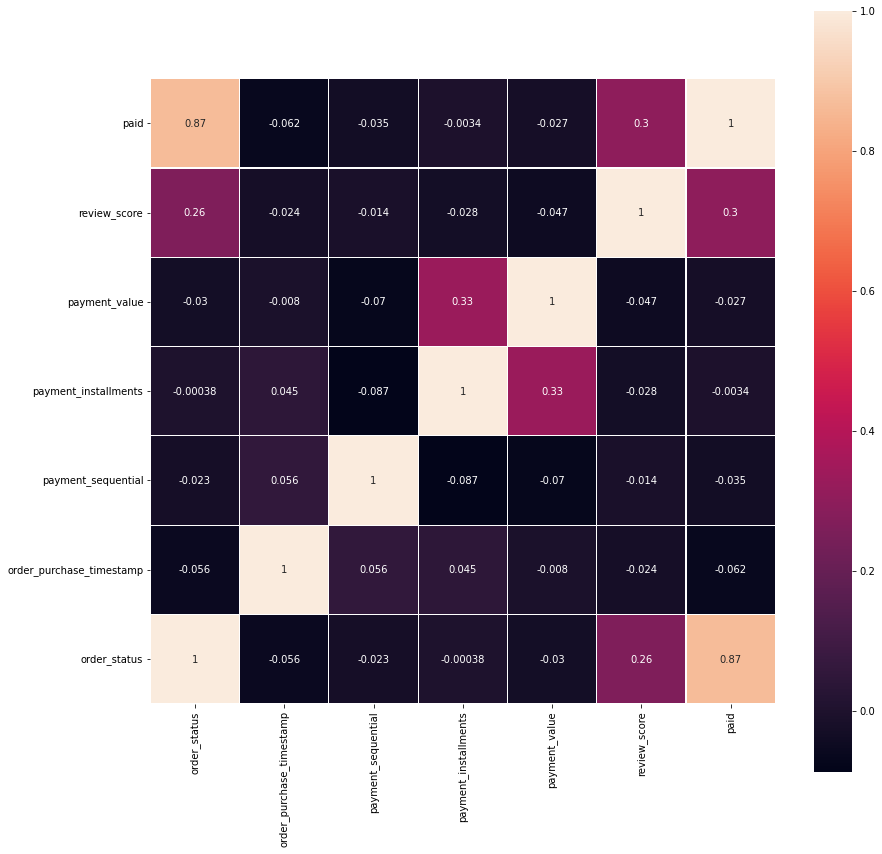

In [41]:
corr_matrix = df.corr()
fig = plt.figure(1, figsize=(14, 14))

sns.heatmap(corr_matrix, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])
plt.show()

Il y a que de tres faible correlation entre les colonnes existantes

# Traitement des valeurs aberrantes

In [42]:
df.describe()

,order_status,order_purchase_timestamp,payment_sequential,payment_installments,payment_value,review_score,paid
count,103677.000000,103677.000000,103677.000000,103677.000000,103677.000000,103677.000000,103677.000000
mean,7.882722,305.926001,1.093685,2.854085,153.666237,4.083886,0.970794
std,0.780139,154.014645,0.711547,2.687863,215.889863,1.349185,0.168385
min,1.000000,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8.000000,181.000000,1.000000,1.000000,56.780000,4.000000,1.000000
50%,8.000000,287.000000,1.000000,1.000000,99.950000,5.000000,1.000000
75%,8.000000,417.000000,1.000000,4.000000,171.490000,5.000000,1.000000
max,8.000000,787.000000,29.000000,24.000000,13664.080000,5.000000,1.000000


In [43]:
colonnes=list(df.columns)
quan=[i for i in colonnes if df[i].dtypes in ['float64', 'int64']]
qual=[i for i in colonnes if df[i].dtypes=="object"]
print(qual, quan)

['payment_type', 'review_comment_message', 'customer_unique_id', 'customer_city', 'customer_state'] ['order_status', 'order_purchase_timestamp', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score', 'paid']


La colonne review_score et order_status sont catégorielles

In [44]:
#df['review_score']=df['review_score'].astype("object")
df['order_status']=df['order_status'].astype('object')
colonnes=list(df.columns)
quan=[i for i in colonnes if df[i].dtypes in ['float64', 'int64']]
qual=[i for i in colonnes if df[i].dtypes=="object"]
print(qual, quan)

['order_status', 'payment_type', 'review_comment_message', 'customer_unique_id', 'customer_city', 'customer_state'] ['order_purchase_timestamp', 'payment_sequential', 'payment_installments', 'payment_value', 'review_score', 'paid']


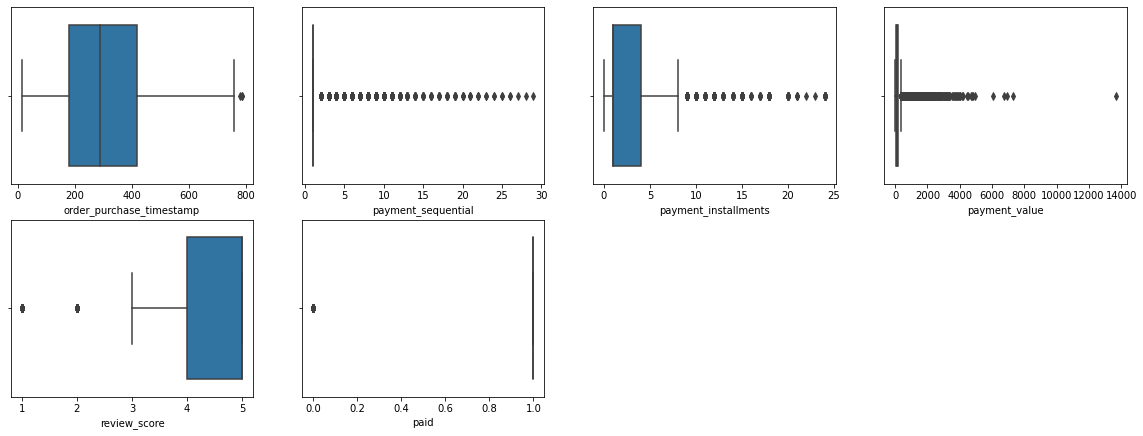

In [45]:
fig = plt.figure(1, figsize=(20, 15))
for i,col in enumerate(quan) :
    plt.subplot(4,4,i+1)
    sns.boxplot(x=col, data=df)
plt.show()

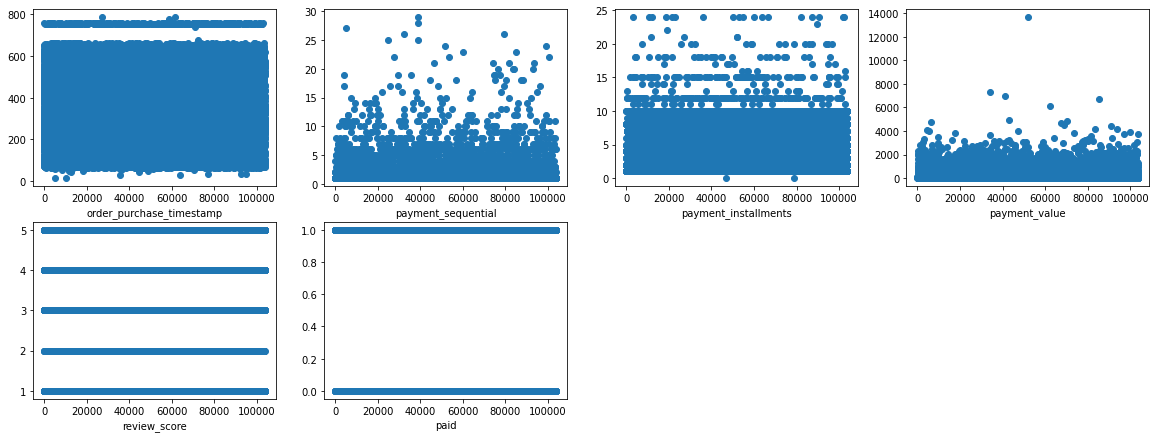

In [46]:
fig = plt.figure(1, figsize=(20, 15))
for i,col in enumerate(quan) :
    plt.subplot(4,4,i+1)
    plt.scatter(np.arange(0, len(df[col])), df[col])
    plt.xlabel(col)
    #sns.boxplot(x=col, data=df)
plt.show()

La payement_value et le payement_sequential paraissent avoir des valeurs aberrantes. Analysons les un a un

In [47]:
df['payment_sequential'].describe()

count    103677.000000
mean          1.093685
std           0.711547
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          29.000000
Name: payment_sequential, dtype: float64

In [48]:
df["payment_sequential"].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

Donc apparement, il n'y a pas de valeur aberrante. On passe donc à la variable payement_value

In [49]:
df['payment_value'].describe()

count    103677.000000
mean        153.666237
std         215.889863
min           0.000000
25%          56.780000
50%          99.950000
75%         171.490000
max       13664.080000
Name: payment_value, dtype: float64

In [50]:
df[df['payment_value']==df['payment_value'].max()]

,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,paid
52415,8,397,1,credit_card,1,13664.08,1.0,nanPeço por favor verificar a entrega do pedid...,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1


In [51]:
print(list(df['payment_value'].unique()))

[99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 81.16, 51.84, 341.09, 51.95, 188.73, 141.9, 75.78, 105.28, 157.45, 132.04, 98.94, 244.15, 136.71, 47.69, 170.57, 67.5, 353.09, 330.66, 45.17, 541.0, 139.22, 290.16, 283.34, 13.78, 30.28, 26.58, 89.68, 65.09, 173.84, 103.49, 64.03, 157.15, 130.88, 47.72, 117.74, 56.6, 266.16, 31.38, 121.49, 32.0, 153.41, 278.22, 91.66, 132.51, 542.66, 166.04, 368.98, 113.2, 99.43, 27.35, 43.77, 68.49, 105.53, 387.8, 84.14, 210.82, 90.05, 67.88, 37.58, 89.63, 69.46, 78.3, 50.8, 34.0, 77.1, 566.4, 402.42, 57.53, 44.01, 187.51, 77.7, 48.68, 77.29, 117.71, 169.34, 37.61, 13.8, 227.12, 34.78, 342.56, 73.34, 117.85, 48.62, 53.99, 51.14, 121.45, 117.68, 56.77, 115.59, 60.07, 27.27, 32.15, 195.71, 43.12, 88.49, 34.09, 40.99, 71.99, 47.0, 81.78, 231.45, 144.2, 35.14, 285.79, 176.7, 27.63, 134.56, 96.98, 110.03, 17.78, 44.0, 110.11, 22.49, 46.63, 52.21, 61.77, 121.88, 75.75, 130.22, 76.02, 90.17, 31.0, 106.77, 163.25, 233.66, 163.08, 135.93, 267.05, 186.72, 30.0, 97.28

In [52]:
df[df['payment_value']>8000]

,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,paid
52415,8,397,1,credit_card,1,13664.08,1.0,nanPeço por favor verificar a entrega do pedid...,0a0a92112bd4c708ca5fde585afaa872,rio de janeiro,RJ,1


Apparement aucune valeur n'est supérieure à 8000 dollars. Donc cette valeur de 13664.08 dollars n'est pas aberrante mais elle va impacter sur la précision du modele alors nous allons la supprimer.

Cette décision aussi parceque le Kmeans qu'on utilisera est tres sensible aux outliers

In [53]:
df.drop(index=df[df["payment_value"]==df["payment_value"].max()].index, inplace=True)

In [54]:
'''def quantile(x):
  q1=df[x].quantile(0.25)
  q3=df[x].quantile(0.75)
  iqr=q3-q1
  dessous=q1-1.5*iqr
  dessus=q3+1.5*iqr
  return (dessous, dessus)

for i in quan:
  df[(df[i]>quantile(i)[1])|(df[i]<quantile(i)[0])][i]=df[i].mean()'''

'def quantile(x):\n  q1=df[x].quantile(0.25)\n  q3=df[x].quantile(0.75)\n  iqr=q3-q1\n  dessous=q1-1.5*iqr\n  dessus=q3+1.5*iqr\n  return (dessous, dessus)\n\nfor i in quan:\n  df[(df[i]>quantile(i)[1])|(df[i]<quantile(i)[0])][i]=df[i].mean()'

Verification en reéaffichant 

# Visualisation des colonnes

## Variable quantitatives

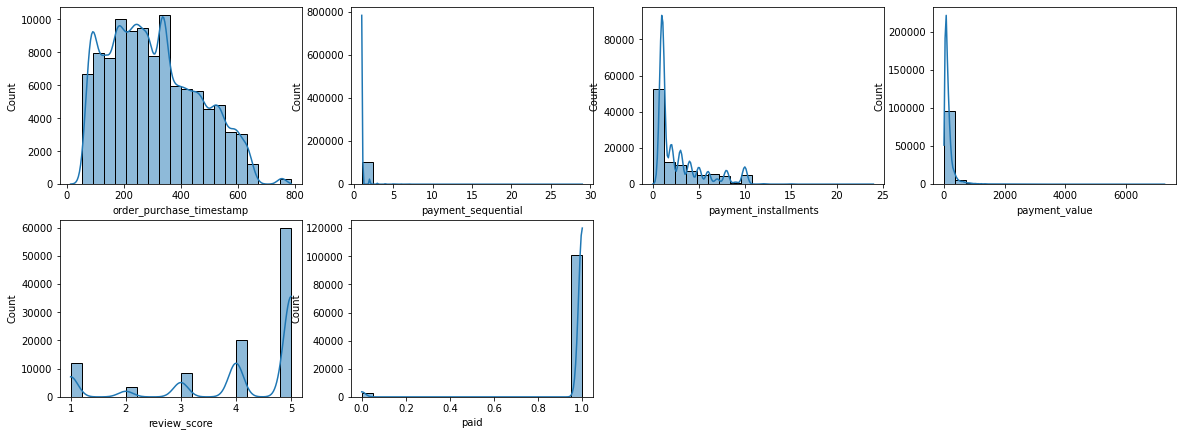

In [55]:
fig = plt.figure(1, figsize=(20, 15))
for i,col in enumerate(quan) :
    plt.subplot(4,4,i+1)
    sns.histplot(x=col, data=df, kde=True, bins=20)
plt.show()

Nous allons normaliser les variables qui n'ont pas une distribution presque gausienne. Cela aidera à la précision de notre modèle.

## Variables qualitatives

In [56]:
quan

['order_purchase_timestamp',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'paid']

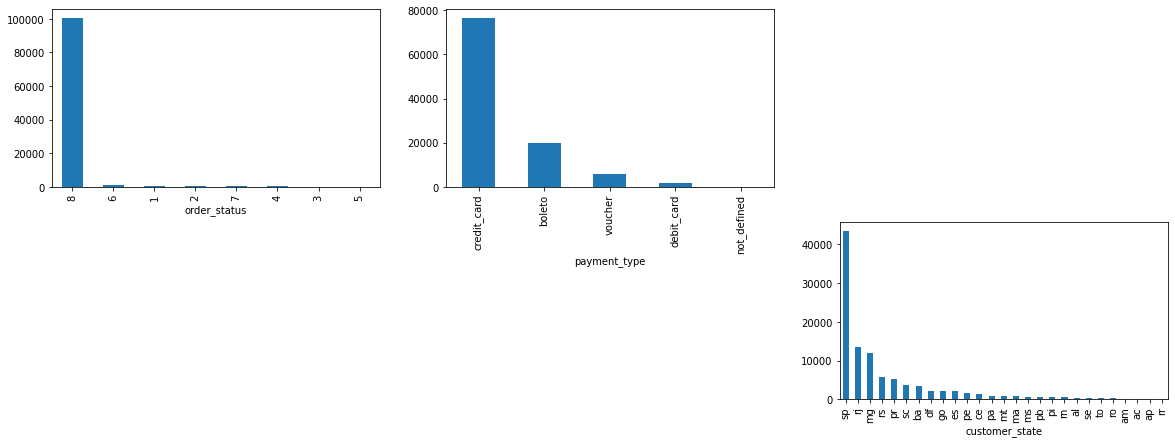

In [57]:
fig = plt.figure(1, figsize=(20, 15))
for i,col in enumerate(qual) :
  if df[col].nunique()>50:
    pass
  else:
    plt.subplot(4,3,i+1)
    df[col].apply(lambda x: str(x).lower()).value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    #sns.histplot(x=col, data=df)
plt.show()

* Plus de 40% des clients viennent de Sao Paulo(sp),
* Plus de 13% viennent  du rio de janeiro 
* Et pres de 12% aussi viennent  de Minas Gerais 
Le reste est minoritaire et dispersé dans tous les provinces du brésil

Aussi, 
* Plus de 90% de commandes ont été libré et
* Moins de 1% seulement sont ennulés
 
 Aussi,
 *La majorité des produits sont payés par carte crédit

laplupart des clients viennent de l"espagne, ont un status 'de commance livré' et payés par carte credit.

# Bivarié

Nous allons vérifier s'il y a un rapport entre :
* les commandes ennulés et la province ou la ville du client
* S'il y a une relation entre le nombre de fois de fois de payement sequentiel avec le mode de payement d'une part puis de l'autre part la zone de provenance.

Tableau de contingence entre Customer_state et order_status

In [58]:
pd.crosstab(df['order_status'], df['customer_state']).apply(lambda x: x/x.sum(), axis=1)

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
order_status,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.001543,0.000000,0.000000,0.026235,0.010802,0.010802,0.015432,0.021605,0.006173,0.095679,0.003086,0.003086,0.006173,0.003086,0.007716,0.007716,0.037037,0.131173,0.000000,0.004630,0.001543,0.038580,0.029321,0.001543,0.535494,0.001543
2,0.000000,0.001570,0.001570,0.000000,0.031397,0.009419,0.018838,0.010989,0.014129,0.010989,0.128728,0.007849,0.004710,0.004710,0.004710,0.007849,0.001570,0.075353,0.109890,0.003140,0.006279,0.000000,0.037677,0.029827,0.007849,0.469388,0.001570
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
4,0.000000,0.009554,0.000000,0.003185,0.035032,0.015924,0.022293,0.006369,0.015924,0.000000,0.098726,0.009554,0.003185,0.006369,0.006369,0.031847,0.009554,0.041401,0.101911,0.003185,0.006369,0.000000,0.044586,0.047771,0.000000,0.477707,0.003185
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
6,0.000909,0.008182,0.000909,0.000000,0.051818,0.030909,0.029091,0.014545,0.027273,0.017273,0.063636,0.002727,0.038182,0.017273,0.009091,0.029091,0.006364,0.025455,0.263636,0.005455,0.000000,0.003636,0.031818,0.024545,0.009091,0.286364,0.002727
7,0.000000,0.006173,0.000000,0.000000,0.027778,0.003086,0.009259,0.012346,0.015432,0.006173,0.129630,0.003086,0.003086,0.006173,0.003086,0.015432,0.012346,0.049383,0.080247,0.000000,0.003086,0.000000,0.074074,0.037037,0.003086,0.500000,0.000000
8,0.000825,0.004093,0.001500,0.000676,0.034496,0.013294,0.021362,0.020378,0.020418,0.007293,0.117260,0.007273,0.008992,0.009667,0.005395,0.016523,0.004958,0.050930,0.128557,0.005057,0.002484,0.000407,0.055272,0.036255,0.003408,0.420306,0.002921


L'hypothèse selon laquelle les produits sont plus livrés à Sao Paulo(sp),rio de janeiro et Minas Geiras est confirmée.

In [59]:
pd.crosstab(df['order_status'], df['review_score']).apply(lambda x: x/x.sum(), axis=1)

review_score,1.0,2.0,3.0,4.0,5.0
order_status,,,,,
1,0.682099,0.078704,0.074074,0.041667,0.123457
2,0.775510,0.080063,0.056515,0.031397,0.056515
3,0.666667,0.000000,0.000000,0.000000,0.333333
4,0.843949,0.085987,0.028662,0.019108,0.022293
5,0.500000,0.000000,0.000000,0.500000,0.000000
6,0.623636,0.073636,0.107273,0.082727,0.112727
7,0.731481,0.083333,0.055556,0.046296,0.083333
8,0.097826,0.030731,0.082605,0.197202,0.591636


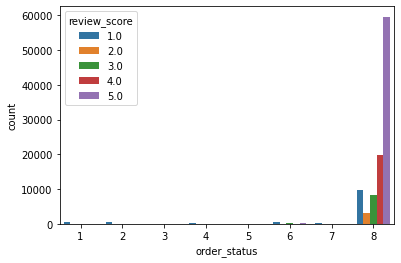

In [60]:
sns.countplot(x='order_status', hue='review_score', data=df)

Nous observons ici que mieux les produits sont commentés, plus il sont payés. 

les produits à commentaires négatifs sont plus ennulés par les utilisateurs et les produits commentaire positifs ou exellents sont plus livrés. Mais il ya peux etre un autre parametre qui l"influence. Le fait que les produit à review_score de 2 sont moins livrés que les produits à review_score de 1

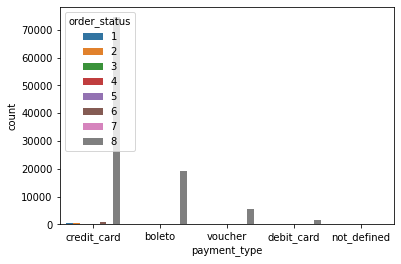

In [61]:
sns.countplot(x='payment_type', hue='order_status', data=df)

Les produits les plus livrés sont plus livrés par carte credit

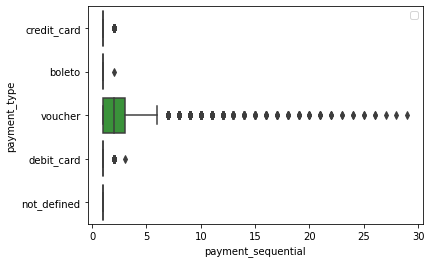

In [62]:
sns.boxplot(x='payment_sequential', y='payment_type', data=df)

plt.legend()

Les payements échélonnées sont plus réglés par bon de commande et donc les client payent plus le total d'un coup par carte credit, par carte debit et par boleto.

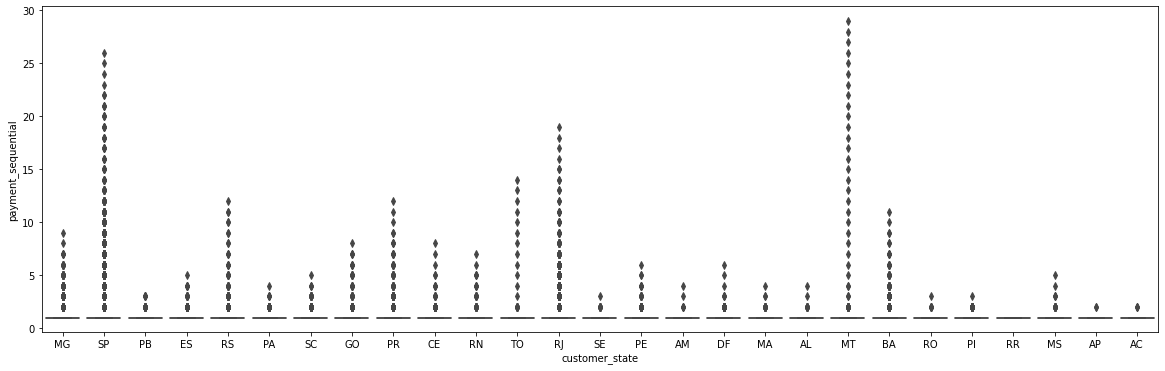

In [63]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='customer_state', y='payment_sequential', data=df)

Ceux qui sont en Sp, MT et en RJ payent plus de manière échelonné
Ceux qui sont en AP, AC  payent plus le tout en une, deux ou trois fois au plus.

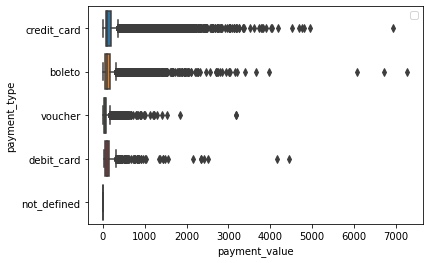

In [64]:
sns.boxplot(x='payment_value', y='payment_type', data=df)
plt.legend()

* Les plus gros payements sont réalisés par carte credit et par et par boleto.
* Les plus petits payements sont réalisés par bon de commandes

In [65]:
quan

['order_purchase_timestamp',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'paid']

# Multivarié

In [66]:
df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [67]:

def pay(x):
  if x in ['credit_card', 'debit_card']:
    x=3
  elif x=='boleto':
    x=2
  elif x=='voucher':
    x=1
  else:
    x=0
  return x

df['payment_type']=df['payment_type'].apply(lambda x: pay(x))

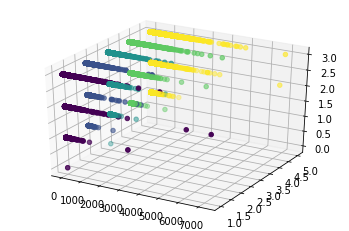

In [68]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
ax=plt.axes(projection='3d')
ax.scatter(df['payment_value'], df['review_score'], df['payment_type'], c=df["review_score"])

In [69]:
qual

['order_status',
 'payment_type',
 'review_comment_message',
 'customer_unique_id',
 'customer_city',
 'customer_state']

# Essai de prediction avec le RFM

Ajout des colonnes RFM à la base de données

In [70]:
dic={}

In [71]:
df['customer_city']=df['customer_city'].map(str)+'-'+df['customer_state'].map(str)
df.drop(columns=['customer_state'], inplace=True)

In [72]:
df.columns

Index(['order_status', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'review_comment_message', 'customer_unique_id', 'customer_city',
       'paid'],
      dtype='object')

In [73]:
df_custom = df.sort_values("order_status").groupby('customer_unique_id').agg({
    'order_status': 'max',
    'order_purchase_timestamp': 'min',
    'paid': 'sum',
    'payment_sequential': 'sum',
    'payment_type': 'mean',
    'review_score':'sum',
    'review_comment_message':'count',
    'customer_city':'first',
    'payment_installments':'sum',
    'payment_value': 'sum',

    
    }
)

Nous ne prenons que les commandes livrés comme de vrais commandes

In [74]:
df_custom['customer_unique_id']=df_custom.index
dic['customer_unique_id']=df_custom['customer_unique_id']
dic['F']=df.sort_values("order_status").groupby("customer_unique_id").sum()['paid']
dic['M']=df.sort_values("order_status").groupby('customer_unique_id').sum()['payment_value'] #'review_score'
dic["R"]=df.sort_values("order_status").groupby('customer_unique_id').min()['order_purchase_timestamp']
dic["review_score"]=df.sort_values("order_status").groupby('customer_unique_id').sum()['review_score']

In [75]:
df.columns

Index(['order_status', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'review_comment_message', 'customer_unique_id', 'customer_city',
       'paid'],
      dtype='object')

In [76]:
df_custom

,order_status,order_purchase_timestamp,paid,payment_sequential,payment_type,review_score,review_comment_message,customer_city,payment_installments,payment_value,customer_unique_id
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,8,174,1,1,3.0,5.0,1,cajamar-SP,8,141.90,0000366f3b9a7992bf8c76cfdf3221e2
0000b849f77a49e4a4ce2b2a4ca5be3f,8,177,1,1,3.0,4.0,1,osasco-SP,1,27.19,0000b849f77a49e4a4ce2b2a4ca5be3f
0000f46a3911fa3c0805444483337064,8,600,1,1,3.0,3.0,1,sao jose-SC,8,86.22,0000f46a3911fa3c0805444483337064
0000f6ccb0745a6a4b88665a16c9f078,8,384,1,1,3.0,4.0,1,belem-PA,4,43.62,0000f6ccb0745a6a4b88665a16c9f078
0004aac84e0df4da2b147fca70cf8255,8,351,1,1,3.0,5.0,1,sorocaba-SP,6,196.89,0004aac84e0df4da2b147fca70cf8255
...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,8,510,1,1,3.0,5.0,1,sanharo-PE,10,2067.42,fffcf5a5ff07b0908bd4e2dbc735a684
fffea47cd6d3cc0a88bd621562a9d061,8,325,1,1,3.0,4.0,1,feira de santana-BA,1,84.58,fffea47cd6d3cc0a88bd621562a9d061
ffff371b4d645b6ecea244b27531430a,8,631,1,1,3.0,5.0,1,sinop-MT,1,112.46,ffff371b4d645b6ecea244b27531430a


In [77]:
data=pd.DataFrame().from_dict(dic)

In [78]:
data=data.set_index(np.arange(0, len(data)))
data.head()

,customer_unique_id,F,M,R,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,174,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,177,4.0
2,0000f46a3911fa3c0805444483337064,1,86.22,600,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,384,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,351,5.0


In [79]:
data.shape, df.shape

((95378, 5), (103676, 11))

In [80]:
data.sort_values('F', ascending=False).head()

,customer_unique_id,F,M,R,review_score
57614,9a736b248f67d166d2fbb006bcb877c3,33,233.49,449,165.0
32361,569aa12b73b5f7edeaa6f2a01603e381,26,62.68,511,130.0
53821,90807fdb59eec2152bc977feeb6e47e7,24,215.70,340,24.0
10944,1d2435aa3b858d45c707c9fc25e18779,24,233.70,652,112.0
93068,f9ae226291893fda10af7965268fb7f6,23,521.07,599,81.0


Calcul des scores RFM

## Visualisation 

In [81]:
#Recence
data['R'].describe()

count    95378.000000
mean       301.942932
std        153.421121
min         14.000000
25%        177.000000
50%        283.000000
75%        411.000000
max        787.000000
Name: R, dtype: float64

Laplupart des utilisateurs ont éfectués leurs achat il y a de cela 1 an. L'achat le plus recent sur le site date de 14 jours.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


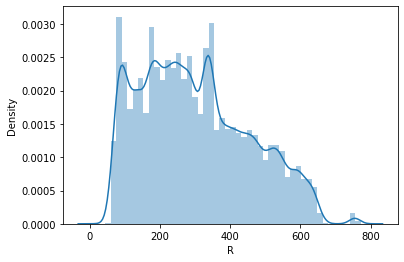

In [82]:

import seaborn as sns
x = data['R']
ax = sns.distplot(x)

Distribution presque normale mais légèrement étalée vers la droite

In [83]:
data['F'].value_counts(normalize=True)

1     0.914917
2     0.045367
0     0.027522
3     0.007234
4     0.002558
5     0.000860
6     0.000619
7     0.000325
8     0.000115
9     0.000105
11    0.000073
10    0.000063
12    0.000052
13    0.000042
15    0.000031
14    0.000031
19    0.000021
24    0.000021
22    0.000010
26    0.000010
33    0.000010
23    0.000010
Name: F, dtype: float64

In [84]:
#Frequence
data['F'].describe()

count    95378.000000
mean         1.055254
std          0.506216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         33.000000
Name: F, dtype: float64

En moyenne un utilisateur n'a effectué qu'un payement.Plus de 75% des client n'ont fait qu'une commande. La plus grande quantité de produit payés jusqu"a ce jour par individu est de 33.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


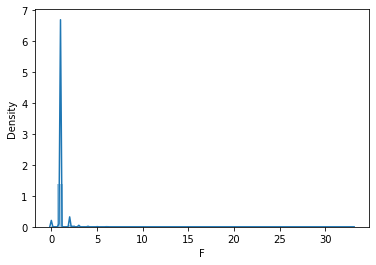

In [85]:
#Montary distribution plot
import seaborn as sns
x = data['F']
ax = sns.distplot(x)

In [86]:
#Montant
data['M'].describe()

count    95378.000000
mean       166.893732
std        227.477147
min          0.000000
25%         63.120000
50%        108.015000
75%        183.860000
max       9553.020000
Name: M, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


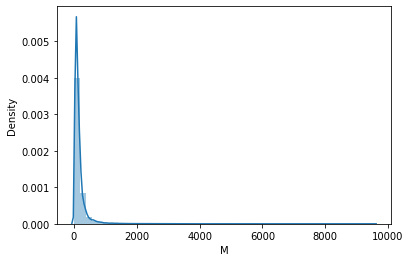

In [87]:
#Recency distribution plot
import seaborn as sns
x = data['M']
ax = sns.distplot(x)

## Score RFM

Calcul du score RFM

In [88]:
#Split into four segments using quantiles
quantiles = data.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [89]:
quantiles

{'F': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'M': {0.25: 63.12, 0.5: 108.015, 0.75: 183.86},
 'R': {0.25: 177.0, 0.5: 283.0, 0.75: 411.0},
 'review_score': {0.25: 4.0, 0.5: 5.0, 0.75: 5.0}}

In [90]:
#Functions to create R, F and M segments
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FnMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [91]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
data['Recence'] = data['R'].apply(RScore, args=('R',quantiles,))
data['Frequence'] = data['F'].apply(FnMScore, args=('F',quantiles,))
data['Montant'] = data['M'].apply(FnMScore, args=('M',quantiles,))
data.head()

,customer_unique_id,F,M,R,review_score,Recence,Frequence,Montant
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,174,5.0,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,177,4.0,4,1,1
2,0000f46a3911fa3c0805444483337064,1,86.22,600,3.0,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,384,4.0,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,351,5.0,2,1,4


In [92]:
data['score']=data['Recence']+data['Frequence']+data['Montant']
data.head()

,customer_unique_id,F,M,R,review_score,Recence,Frequence,Montant,score
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,174,5.0,4,1,3,8
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,177,4.0,4,1,1,6
2,0000f46a3911fa3c0805444483337064,1,86.22,600,3.0,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,384,4.0,2,1,1,4
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,351,5.0,2,1,4,7


In [93]:
data['score'].unique()

array([ 8,  6,  4,  7,  5,  3, 10,  9, 11, 12])

Assigner une valeure à chaque classe

In [94]:
def niveau(x):
  if x>=10:
    x='niveau4'
  elif x>=7:
    x='niveau3'
  elif x>4:
    x='niveau2'
  else:
    x='niveau1'
  return x

In [95]:
data['niveau']=data['score'].apply(lambda x: niveau(x))
data.head(10)

,customer_unique_id,F,M,R,review_score,Recence,Frequence,Montant,score,niveau
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,174,5.0,4,1,3,8,niveau3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,177,4.0,4,1,1,6,niveau2
2,0000f46a3911fa3c0805444483337064,1,86.22,600,3.0,1,1,2,4,niveau1
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,384,4.0,2,1,1,4,niveau1
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,351,5.0,2,1,4,7,niveau3
5,0004bd2a26a76fe21f786e4fbd80607f,1,166.98,209,4.0,3,1,3,7,niveau3
6,00050ab1314c0e55a6ca13cf7181fecf,1,35.38,194,4.0,3,1,1,5,niveau2
7,00053a61a98854899e70ed204dd4bafe,1,419.18,245,1.0,3,1,4,8,niveau3
8,0005e1862207bf6ccc02e4228effd9a0,1,150.12,606,4.0,1,1,3,5,niveau2
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,129.76,233,1.0,3,1,3,7,niveau3


In [96]:
df_custom['niveau']=data['niveau'].values
df_custom=df_custom.set_index(np.arange(0, len(df_custom)))

In [97]:
df_custom["score"]=data['score'].values

In [98]:
df_custom.head()

,order_status,order_purchase_timestamp,paid,payment_sequential,payment_type,review_score,review_comment_message,customer_city,payment_installments,payment_value,customer_unique_id,niveau,score
0,8,174,1,1,3.0,5.0,1,cajamar-SP,8,141.90,0000366f3b9a7992bf8c76cfdf3221e2,niveau3,8
1,8,177,1,1,3.0,4.0,1,osasco-SP,1,27.19,0000b849f77a49e4a4ce2b2a4ca5be3f,niveau2,6
2,8,600,1,1,3.0,3.0,1,sao jose-SC,8,86.22,0000f46a3911fa3c0805444483337064,niveau1,4
3,8,384,1,1,3.0,4.0,1,belem-PA,4,43.62,0000f6ccb0745a6a4b88665a16c9f078,niveau1,4
4,8,351,1,1,3.0,5.0,1,sorocaba-SP,6,196.89,0004aac84e0df4da2b147fca70cf8255,niveau3,7


In [99]:
'''# ou 
niveau = ['niveau1', 'niveau2', 'niveau3', 'niveau4']
score_cuts = pd.qcut(data['score'], q = 4, labels = niveau)
data['niveau'] = score_cuts.values
data.head()'''

"# ou \nniveau = ['niveau1', 'niveau2', 'niveau3', 'niveau4']\nscore_cuts = pd.qcut(data['score'], q = 4, labels = niveau)\ndata['niveau'] = score_cuts.values\ndata.head()"

Les clients du niveau 4 sont des clients à garder

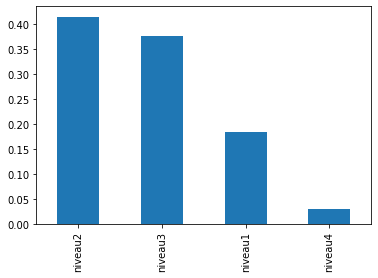

In [100]:
df_custom['niveau'].value_counts(normalize=True).plot(kind='bar')

Le site a plus de clients infideles(niveau 2) 
* Moins de 5 % de clients fidèles

In [101]:
'''for i in data['customer_id']:
  df[df['customer_id']==i]['niveau']=data[data["customer_id"]==i]["niveau"].values[0]'''

'for i in data[\'customer_id\']:\n  df[df[\'customer_id\']==i][\'niveau\']=data[data["customer_id"]==i]["niveau"].values[0]'

In [102]:
quan, qual

(['order_purchase_timestamp',
  'payment_sequential',
  'payment_installments',
  'payment_value',
  'review_score',
  'paid'],
 ['order_status',
  'payment_type',
  'review_comment_message',
  'customer_unique_id',
  'customer_city',
  'customer_state'])

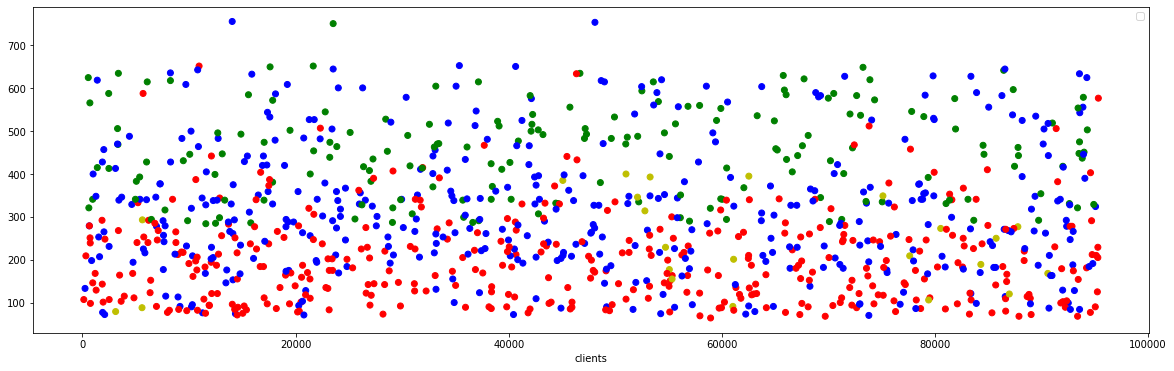

In [103]:
da=df_custom.sample(n=1000)
color=['g', "b", 'r', "y"]
niv = ['niveau1', 'niveau2', 'niveau3', 'niveau4']
def colr(x):
  x=color[niv.index(x)]
  return x
col=da['niveau'].apply(lambda x: colr(x)).values
#print(col)
plt.figure(figsize=(20, 6))
plt.scatter(da.index,  da['order_purchase_timestamp'], c=col)#, c=color[niv.index(data['niveau'])])
plt.xlabel("clients")
plt.legend()

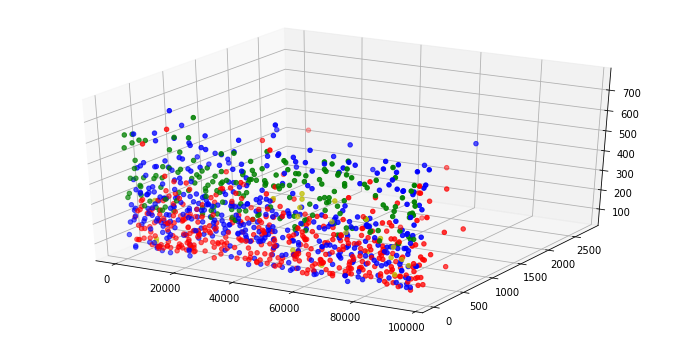

In [104]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure(figsize=(12, 6))
ax=plt.axes(projection='3d')
ax.scatter(da.index, da["payment_value"], da['order_purchase_timestamp'], c=col)#(df['payment_value'], df['review_score'], df['payment_type'], cmap='viridis')

# Enregistrement de la base de données

In [105]:
df_custom.drop(columns=['paid'], inplace=True)
df_custom.columns

Index(['order_status', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'review_score', 'review_comment_message',
       'customer_city', 'payment_installments', 'payment_value',
       'customer_unique_id', 'niveau', 'score'],
      dtype='object')

In [106]:
#df.drop(columns=['paid'], inplace=True)
df.columns

Index(['order_status', 'order_purchase_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_score',
       'review_comment_message', 'customer_unique_id', 'customer_city',
       'paid'],
      dtype='object')

In [107]:
data[['review_score',	'Recence',	'Frequence',	'Montant']].to_csv('data_rfm.csv')
df.to_csv('data_olist.csv')
df_custom.to_csv('data_custom')

# Creation des bases de donnée pour pour connaitre la periode de renouvellement du modele

In [108]:
df["order_purchase_timestamp"]=dfi['order_purchase_timestamp']

In [109]:
a=df["order_purchase_timestamp"].str.split(" ")[0][0].split('-')[0]
a

'2018'

In [110]:
df['temps']=df['order_purchase_timestamp'].apply(lambda x: x.split(" ")[0].split("-")[0])
df['temps']

0         2018
1         2018
2         2017
3         2017
4         2017
          ... 
104472    2018
104473    2017
104474    2017
104475    2018
104476    2017
Name: temps, Length: 103676, dtype: object

In [111]:
df0=df.loc[df['temps']=="2017", :]
df0.shape

(47489, 12)

In [112]:
df['mois']=df['order_purchase_timestamp'].apply(lambda x: x.split(" ")[0].split("-")[1])
#df.drop(columns=['order_purchase_timestamp'], inplace=True)

In [113]:
df1=df.loc[(df['mois']==f'01')&(df['temps']==f'2018')]
df2=df.loc[(df['mois']==f'02')&(df['temps']==f'2018')]
df3=df.loc[(df['mois']==f'03')&(df['temps']==f'2018')]
df4=df.loc[(df['mois']==f'04')&(df['temps']==f'2018')]
df5=df.loc[(df['mois']==f'05')&(df['temps']==f'2018')]
df6=df.loc[(df['mois']==f'06')&(df['temps']==f'2018')]
df7=df.loc[(df['mois']==f'07')&(df['temps']==f'2018')]
df8=df.loc[(df['mois']==f'08')&(df['temps']==f'2018')]
df9=df.loc[(df['mois']==f'09')&(df['temps']==f'2018')]
df10=df.loc[(df['mois']==f'10')&(df['temps']==f'2018')]

In [114]:
df0['mois']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df1=pd.concat([df0, df1])
df2=pd.concat([df1, df2])
df3=pd.concat([df2, df3])
df4=pd.concat([df3, df4])
df5=pd.concat([df4, df5])
df6=pd.concat([df5, df6])
df7=pd.concat([df6, df7])
df8=pd.concat([df7, df8])
df9=pd.concat([df8, df9])
df10=pd.concat([df9, df10])

In [116]:
liste_df=[df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]


In [117]:
for dfn in liste_df:

  dfn.drop(columns=['temps', 'mois'], inplace=True)
df10.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(103333, 11)

In [118]:
for dfa in liste_df:
  print(dfa.shape)

(47489, 11)
(55028, 11)
(62007, 11)
(69493, 11)
(76654, 11)
(83763, 11)
(90159, 11)
(96642, 11)
(103314, 11)
(103329, 11)
(103333, 11)


In [119]:

def rfm(dfe):
    dic={}
    dfe['order_purchase_timestamp']=dfe['order_purchase_timestamp'].map(str).apply(day)
    df_c = dfe.sort_values("order_status").groupby('customer_unique_id').agg({
        'order_status': 'max',
        'order_purchase_timestamp': 'min',
        'paid': 'sum',
        'payment_sequential': 'sum',
        'payment_type': 'mean',
        'review_score':'sum',
        'review_comment_message':'count',
        'customer_city':'first',
        'payment_installments':'sum',
        'payment_value': 'sum',

        
        }
    )

    df_c['customer_unique_id']=df_c.index
    dic['customer_unique_id']=df_c['customer_unique_id']
    dic['F']=dfe.sort_values("order_status").groupby("customer_unique_id").sum()['paid']
    dic['M']=dfe.sort_values("order_status").groupby('customer_unique_id').sum()['payment_value'] 
    dic["R"]=dfe.sort_values("order_status").groupby('customer_unique_id').min()['order_purchase_timestamp']
    dic["review_score"]=dfe.sort_values("order_status").groupby('customer_unique_id').sum()['review_score']
    dat=pd.DataFrame().from_dict(dic)
    dat=dat.set_index(np.arange(0, len(dat)))
    dat['Recence'] = dat['R'].apply(RScore, args=('R',quantiles,))
    dat['Frequence'] = dat['F'].apply(FnMScore, args=('F',quantiles,))
    dat['Montant'] = dat['M'].apply(FnMScore, args=('M',quantiles,))
    return dat
  



In [120]:
len(liste_df)

11

In [121]:
for i, di in enumerate(liste_df):
  print(i)
  liste_df[i]=rfm(di)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1
2
3
4
5
6
7
8
9
10


In [122]:
for i in liste_df:
  print(i.shape)

(43343, 8)
(50307, 8)
(56709, 8)
(63616, 8)
(70278, 8)
(76869, 8)
(82785, 8)
(88818, 8)
(95063, 8)
(95067, 8)
(95068, 8)


In [123]:
liste_df[0]

,customer_unique_id,F,M,R,review_score,Recence,Frequence,Montant
0,0000f46a3911fa3c0805444483337064,1,86.22,600,3.0,1,1,2
1,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,384,4.0,2,1,1
2,0004aac84e0df4da2b147fca70cf8255,1,196.89,351,5.0,2,1,4
3,0005e1862207bf6ccc02e4228effd9a0,1,150.12,606,4.0,1,1,3
4,0006fdc98a402fceb4eb0ee528f6a8d4,1,29.00,470,3.0,1,1,1
...,...,...,...,...,...,...,...,...
43338,fffbf87b7a1a6fa8b03f081c5f51a201,1,167.32,308,5.0,2,1,3
43339,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,510,5.0,1,1,4
43340,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,325,4.0,2,1,2
43341,ffff371b4d645b6ecea244b27531430a,1,112.46,631,5.0,1,1,3


## Enregistrement des bases de données secondaire

In [124]:
for i, dfn in enumerate(liste_df):
  dfn[['Recence',	'Frequence',	'Montant','review_score']].to_csv(f'data{i}.csv')